In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/idertator/Research/apps/.venv/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# SaccRec Recordings

In [20]:
from eoglib.io import load_eog
from eoglib.models import Channel

study = load_eog('data/R130091986.eog')

## Iterating through tests

In [21]:
for test in study:
    print(test)

Horizontal Calibration 30°
Horizontal Saccadic 30°
Horizontal Calibration 30°


# Plotting First Horizontal Calibration Test

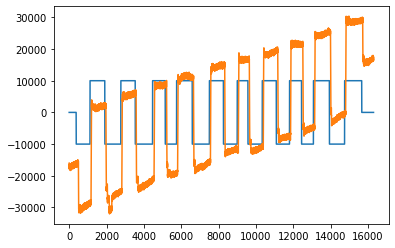

In [22]:
from eoglib.models import Channel

test = study[1]
stimulus = test.channels[Channel.Stimulus]
scaled_stimulus = stimulus * -10000
horizontal = test.channels[Channel.Horizontal]
plot(scaled_stimulus)
plot(horizontal)

## Fix drift

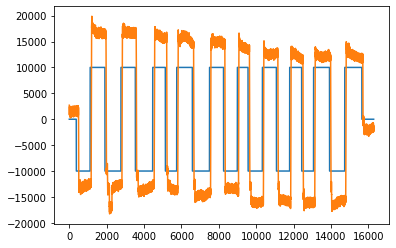

In [23]:
from math import log10, floor
from numpy.polynomial import Polynomial

x = arange(len(horizontal))
pfit, stats = Polynomial.fit(x, horizontal, 1, full=True)
fixed_horizontal = horizontal - pfit(x)

stimulus_scale = -(10 ** floor(log10(max(abs(fixed_horizontal))))) # Change the minus when corrected
scaled_stimulus = stimulus * stimulus_scale

plot(scaled_stimulus)
plot(fixed_horizontal)

## Clean noise

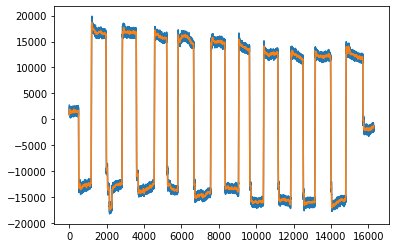

In [24]:
from scipy.signal import medfilt

plot(fixed_horizontal)
filtered_horizontal = medfilt(fixed_horizontal, 15)
plot(filtered_horizontal)

## Final Plot

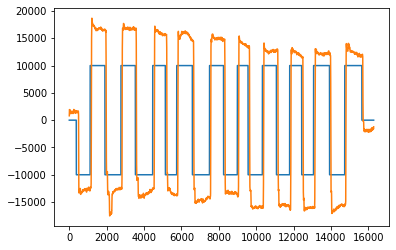

In [25]:
plot(scaled_stimulus)
plot(filtered_horizontal)